In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
yelp = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

In [3]:
yelp.shape

(7997, 6)

In [4]:
yelp.head()

,review_id,business_id,user_id,text,date,stars
0,3223,2055,2533,"Sometimes things happen, and when they do this...",2010-12-30,5
1,9938,4165,6371,I know Kerrie through my networking and we ben...,2011-04-26,5
2,7123,869,4929,Love their pizza!!!\nVery fresh. Their cannoli...,2012-09-28,5
3,3601,1603,2789,Being from NJ I am always on the prowl for my ...,2009-06-07,4
4,3948,2347,1245,We have tried this spot a few times and each v...,2011-02-20,4


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7997 entries, 0 to 7996
Data columns (total 6 columns):
review_id      7997 non-null int64
business_id    7997 non-null int64
user_id        7997 non-null int64
text           7997 non-null object
date           7997 non-null object
stars          7997 non-null int64
dtypes: int64(4), object(2)
memory usage: 374.9+ KB


In [6]:
yelp.describe()

,review_id,business_id,user_id,stars
count,7997.000000,7997.000000,7997.000000,7997.000000
mean,4993.221458,1465.919720,2627.563711,3.777667
std,2892.665686,1141.276766,1868.212731,1.214629
min,2.000000,1.000000,1.000000,1.000000
25%,2479.000000,497.000000,927.000000,3.000000
50%,4984.000000,1197.000000,2365.000000,4.000000
75%,7497.000000,2273.000000,4163.000000,5.000000
max,9999.000000,4174.000000,6402.000000,5.000000


In [7]:
yelp['text length'] = yelp['text'].apply(len)
test['text length'] = test['text'].apply(len)
yelp.head()

,review_id,business_id,user_id,text,date,stars,text length
0,3223,2055,2533,"Sometimes things happen, and when they do this...",2010-12-30,5,211
1,9938,4165,6371,I know Kerrie through my networking and we ben...,2011-04-26,5,426
2,7123,869,4929,Love their pizza!!!\nVery fresh. Their cannoli...,2012-09-28,5,110
3,3601,1603,2789,Being from NJ I am always on the prowl for my ...,2009-06-07,4,442
4,3948,2347,1245,We have tried this spot a few times and each v...,2011-02-20,4,332


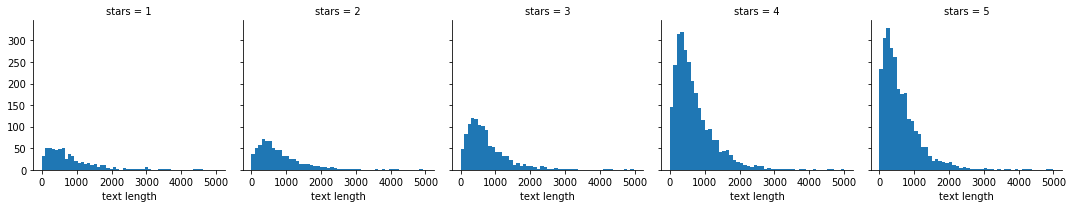

In [8]:
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)

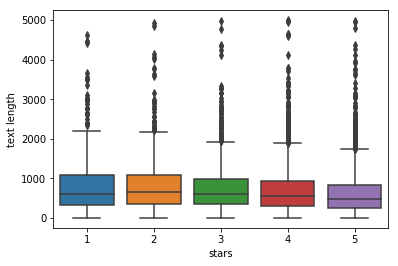

In [9]:
sns.boxplot(x='stars', y='text length', data=yelp)

In [10]:
X = yelp['text']
y = yelp['stars']

In [11]:
X[0]

"Sometimes things happen, and when they do this is the place where you want them taken care of. The orthopedics department and trauma department have some of the best, and nicest Doctors you'll find in the state."

In [12]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [13]:
sample_text = X[0]
print(text_process(sample_text))

['Sometimes', 'things', 'happen', 'place', 'want', 'taken', 'care', 'orthopedics', 'department', 'trauma', 'department', 'best', 'nicest', 'Doctors', 'youll', 'find', 'state']


In [14]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [15]:
len(bow_transformer.vocabulary_)

39002

In [16]:
review_25 = X[24]
review_25

'Potbelly, you have been handed the torch.\n\nIt was a good ride Jimmy Johns, but you have no locations close to my newly purchased home.  Its not you, its me.  I promise.\n\nI love italian-style subs.  The Wreck at Potbelly is fantastic.  The Wreck salad is also great (for a salad).  \n\nThis place is my new go to sub shack.'

In [17]:
bow_25 = bow_transformer.transform([review_25])
print(bow_25)

  (0, 6713)	1
  (0, 6741)	1
  (0, 9587)	2
  (0, 13049)	2
  (0, 13851)	1
  (0, 17398)	1
  (0, 21296)	1
  (0, 22813)	1
  (0, 22869)	1
  (0, 23085)	1
  (0, 23463)	1
  (0, 24019)	1
  (0, 25209)	1
  (0, 26294)	1
  (0, 26424)	1
  (0, 28050)	1
  (0, 28061)	1
  (0, 29985)	1
  (0, 30770)	1
  (0, 30967)	1
  (0, 32127)	1
  (0, 32495)	2
  (0, 33240)	1
  (0, 35082)	1
  (0, 35100)	1
  (0, 36508)	1


In [18]:
print(bow_transformer.get_feature_names()[9587])
print(bow_transformer.get_feature_names()[13049])
print(bow_transformer.get_feature_names()[32495])

Potbelly
Wreck
salad


In [19]:
X = bow_transformer.transform(X)

In [20]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (7997, 39002)
Amount of Non-Zero occurrences:  464225
Density: 0.14883824857735836


In [22]:
import numpy as np
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.20, random_state=0)


In [23]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb1 = MultinomialNB()
nb.fit(X_train, y_train)
nb1.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
preds = nb.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[ 22  11  11  51  20]
 [  4  11  15  94  16]
 [  0   5  15 205  21]
 [  3   3  11 412 129]
 [  2   2   5 236 296]]


             precision    recall  f1-score   support

          1       0.71      0.19      0.30       115
          2       0.34      0.08      0.13       140
          3       0.26      0.06      0.10       246
          4       0.41      0.74      0.53       558
          5       0.61      0.55      0.58       541

avg / total       0.47      0.47      0.43      1600



In [26]:
positive_review = yelp['text'][59]
print('star:',yelp['stars'][59])
print('\n')
print(positive_review)
positive_review_transformed = bow_transformer.transform([positive_review])
print('\n')
print('predict star:',nb.predict(positive_review_transformed)[0])

star: 5


Huge fan of Bikram yoga! It's a 90 minute, torturous-at-times, sweat-filled  workout but when you are done, you feel insanely amazing. The feeling continues throughout the day leaving you in complete zen....Road rage? Gone. Annoying food cravings? Zero. Jeans? Fitting awesome. You really must try it, it can completely change your body.

There are a few places in the valley that offer Bikram, most of them exclusively rather than in combo with other methods of yoga. The Bikram Institute on Miller and Indian School is where I first tried it, and I like it the best so far. They offer classes throughout the day and later in the evening as well. Like other studios, this place offers first timers a week-long pass for around $20. What I really like about this studio is their instructors and the fact that they keep their room darkened throughout the entire practice. I've have been going to another studio lately (for their first-time student deals) and their instructors bark out instru

In [27]:
negative_review = yelp['text'][7975]
print('star:',yelp['stars'][7975])
print('\n')
print(negative_review)
negative_review_transformed = bow_transformer.transform([negative_review])
print('\n')
print('predict star:',nb.predict(negative_review_transformed)[0])

star: 1


$8 for a tiny sandwich with one egg, two greasy strips of bacon, and a stale muffin. They say it's pricy because they get it local? It has to have substance to be considered anything. So whack.


predict star: 4


In [28]:
test['stars'] = 0
review = test['text']
review

0       Ticoz is not a bad place.  The menu is eclecti...
1       Wow!\nBeing a Phoenix native, we have enjoyed ...
2       Jodi is fantastic!  Extraordinary!  After too ...
3       T&S Glass did a wonderful job replacing my car...
4       My experience was on a random Saturday afterno...
5       I waited months before finally getting around ...
6       I was in Phoenix for three weeks on a business...
7       I work right across the street and a few of us...
8       I really enjoy That's A Wrap... all of the foo...
9       Sadly, I have to join the crowd on this one. I...
10      Fabulous. \n\nHoly Kobe Beef Burger with Avoca...
11      I've been visiting, and thinking, and visiting...
12      Long ago, Salvation Army used to be the place ...
13      Meh....decent Filibertos knockoff but the plac...
14      Ok, I'm new to the whole Thai food thing, and ...
15      I am one of those people that talk crap about ...
16      Eh, lukewarm feelings about this one.  I had l...
17      I have

In [29]:
for i in range(len(review)):
    review_transformed = bow_transformer.transform([review[i]])
    predict = nb.predict(review_transformed)
    test['stars'][i] = predict
 

C:\Users\an651_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [30]:
columns = ["review_id","stars"]
submission = test[columns]


In [31]:
submission.to_csv("submission.csv",index=False,sep=',',header=False)